## ${\textbf{Libraries}}$

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

## ${\textbf{Import Data}}$

In [54]:
# Read both files
df_cohort = pd.read_csv('cohort_data.csv',  encoding='ISO-8859-1')
df_cohort2 = pd.read_csv('cohort_data2.csv', encoding='ISO-8859-1')

# Concatenate the DataFrames 
df_cohort = pd.concat([df_cohort, df_cohort2])

df_cohort.shape

(1067371, 8)

## ${\textbf{Data Preparation}}$

In [55]:
df_cohort

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France


In [56]:
# Rename the columns
df_cohort = df_cohort.rename(columns={
    'Invoice': 'invoice_number',
    'StockCode': 'stock_code',
    'Description': 'description',
    'Quantity': 'quantity',
    'InvoiceDate': 'invoice_date',
    'Price': 'price',
    'Customer ID': 'customer_id',
    'Country': 'country'
    })

In [57]:
# Drop duplicate rows 
df_cohort = df_cohort.drop_duplicates()

print("Number of rows in the DataFrame after dropping duplicates:", len(df_cohort))

Number of rows in the DataFrame after dropping duplicates: 1033036


In [58]:
# Checking for missing values and dtypes
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033036 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   invoice_number  1033036 non-null  object 
 1   stock_code      1033036 non-null  object 
 2   description     1028761 non-null  object 
 3   quantity        1033036 non-null  int64  
 4   invoice_date    1033036 non-null  object 
 5   price           1033036 non-null  float64
 6   customer_id     797885 non-null   float64
 7   country         1033036 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 70.9+ MB


In [59]:
# Sample of misisng customer_id's
missing_customer_id_sample = df_cohort[df_cohort['customer_id'].isnull()].sample(5)

print(missing_customer_id_sample)

       invoice_number stock_code                       description  quantity  \
265534         560225      21889            WOODEN BOX OF DOMINOES         1   
127803         547248      22423          REGENCY CAKESTAND 3 TIER         2   
447471         574950     46776F  WOVEN ROSE GARDEN CUSHION COVER          1   
509345         579297      48138                DOORMAT UNION FLAG         2   
528149         580729      21408         SPOTTY PINK DUCK DOORSTOP         2   

            invoice_date  price  customer_id         country  
265534  15/07/2011 16:27   2.46          NaN  United Kingdom  
127803  22/03/2011 09:23  24.96          NaN  United Kingdom  
447471  08/11/2011 09:29   4.13          NaN  United Kingdom  
509345  29/11/2011 11:23  14.13          NaN  United Kingdom  
528149  05/12/2011 17:24   8.29          NaN  United Kingdom  


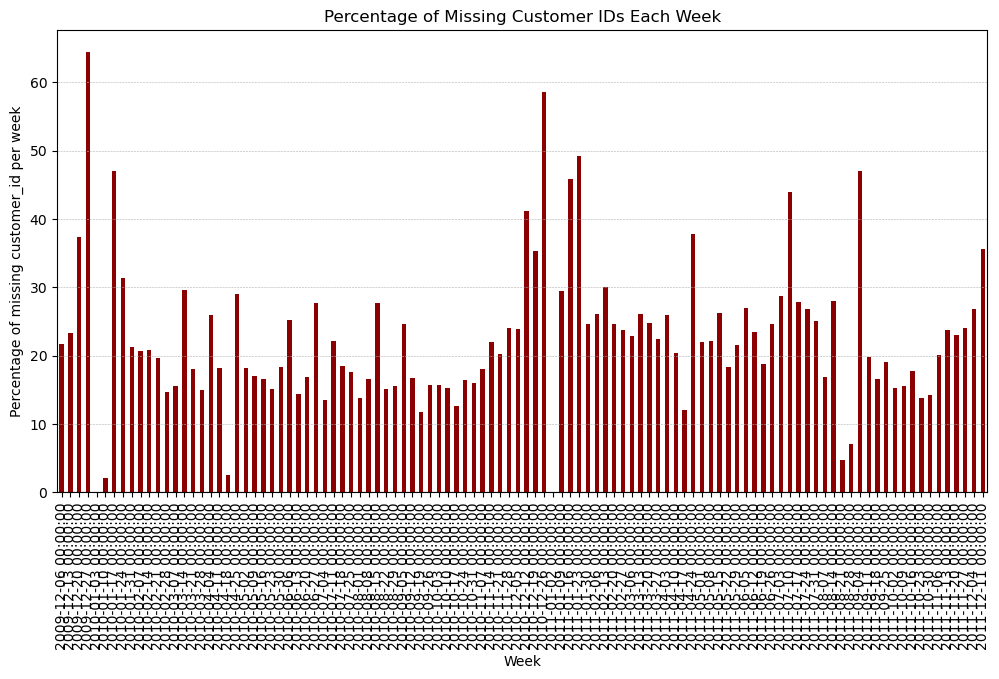

In [60]:
# Unfortunately, about +230,000 customer_id's are missing.
# Let's see if this is effecting the transactional data in a way that for e.g. an entire week is missing.

# First, I have to convert the "invoice_date" column from an object dtype to datetime format.
df_cohort['invoice_date'] = pd.to_datetime(df_cohort['invoice_date'], format='%d/%m/%Y %H:%M')

# Number of missing customer_id's by week
weekly_missing_ids = df_cohort[df_cohort['customer_id'].isnull()].resample('W', on='invoice_date').size()
weekly_total_transactions = df_cohort.resample('W', on='invoice_date').size()

# Percentage of missing customer_id's per week
weekly_missing_percentage = (weekly_missing_ids / weekly_total_transactions) * 100

# Plotting
plt.figure(figsize=(12, 6))
weekly_missing_percentage.plot(kind='bar', color='darkred')
plt.title('Percentage of Missing Customer IDs Each Week')
plt.xlabel('Week')
plt.ylabel('Percentage of missing customer_id per week')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.4)
plt.axhline(y=0, color='black', linewidth=0.8) 
plt.xticks(rotation=90)
plt.show()

# Did not want to spent more than 10min. on improving readability by removing "%H:%M" from the datetime. There is some kind of issue.

In [61]:
# The significant variations in the percentages of missing customer_id's each week indicate potential issues 
# with data collection consistency or entry errors over the period. 
# High percentages of missing IDs, especially those reaching above 30%, 
# could dramatically impact the accuracy of my week-based Cohort Analysis, particularly in assessing customer behavior and retention.
# Weeks with extremely high percentages, such as over 50%, suggest that data might be incomplete for those periods, 
# which could lead to skewed insights regarding customer activity and the effectiveness of marketing campaigns during those times. 
# For instance, the weeks showing around 60% missing data around the end of December in multiple years likely reflect 
# a systematic issue around year-end processing or data entry. 
# Since I need the customer_id for further segmentation, I'm going to drop the rows with missing values in the "customer_id" column.
# For the later analysis, I have to keep this in mind here. 

In [62]:
df_cohort = df_cohort.dropna(subset=['customer_id'])
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   invoice_number  797885 non-null  object        
 1   stock_code      797885 non-null  object        
 2   description     797885 non-null  object        
 3   quantity        797885 non-null  int64         
 4   invoice_date    797885 non-null  datetime64[ns]
 5   price           797885 non-null  float64       
 6   customer_id     797885 non-null  float64       
 7   country         797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


## ${\textbf{Customer Purchase Frequency}}$

In [63]:
# Total number of customers
total_customers = len(df_cohort['customer_id'].unique())
# Total number of orders (unique invoice numbers)
total_orders = len(df_cohort['invoice_number'].unique())

print(f"Total number of customers: {total_customers}")
print(f"Total number of orders: {total_orders}")

Total number of customers: 5942
Total number of orders: 44876


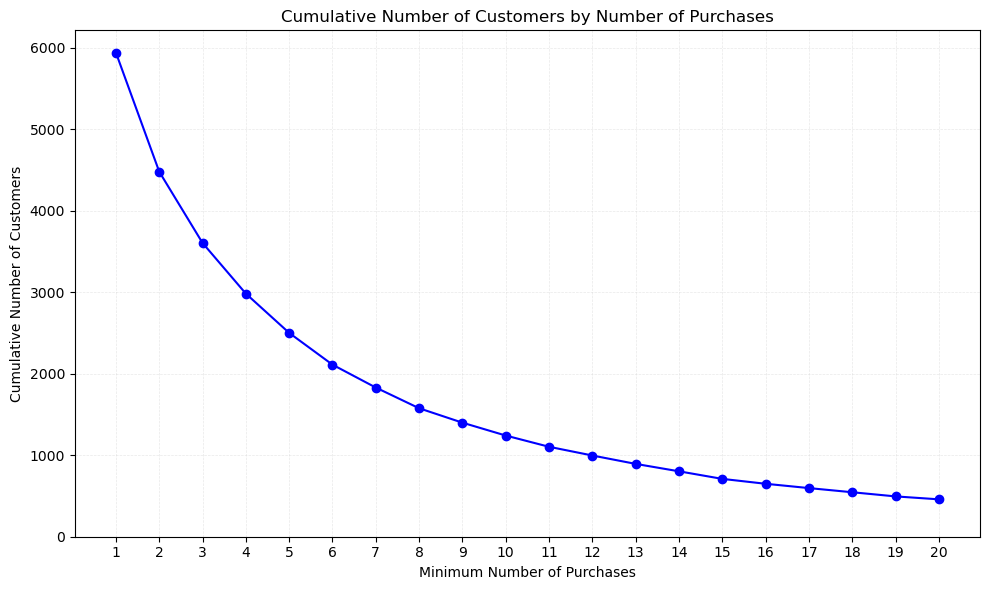

We have 5942 unique customers in total (100.00%).
We have 4481 customers that made at least 2 purchases (75.41%).
We have 3606 customers that made at least 3 purchases (60.69%).
We have 2984 customers that made at least 4 purchases (50.22%).
We have 2502 customers that made at least 5 purchases (42.11%).
We have 2112 customers that made at least 6 purchases (35.54%).
We have 1831 customers that made at least 7 purchases (30.81%).
We have 1577 customers that made at least 8 purchases (26.54%).
We have 1400 customers that made at least 9 purchases (23.56%).
We have 1242 customers that made at least 10 purchases (20.90%).
We have 1104 customers that made at least 11 purchases (18.58%).
We have 997 customers that made at least 12 purchases (16.78%).
We have 894 customers that made at least 13 purchases (15.05%).
We have 803 customers that made at least 14 purchases (13.51%).
We have 710 customers that made at least 15 purchases (11.95%).
We have 650 customers that made at least 16 purchase

In [64]:
# Calculate number of unique 'invoice_number' for each 'customer_id'
orders_per_customer = df_cohort.groupby('customer_id')['invoice_number'].nunique()

# Count the occurrences of each unique number of orders across all customers
# and sort them in ascending order of orders
customer_orders_count = orders_per_customer.value_counts().sort_index()

# Prepare data for cumulative calculation:
# Reverse the series to calculate the cumulative sum from the highest order to the lowest
cumulative_customers = customer_orders_count[::-1].cumsum()[::-1]

# Ensure that we're focusing on the top 20 orders if there are more than 20
if len(cumulative_customers) > 20:
    cumulative_customers = cumulative_customers.head(20)

# Reset index to correctly reflect the 'Minimum Number of Purchases'
cumulative_customers.index = np.arange(1, len(cumulative_customers) + 1)

# Cumulative line plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_customers.index, cumulative_customers.values, marker='o', color='b', linestyle='-')
plt.title('Cumulative Number of Customers by Number of Purchases')
plt.xlabel('Minimum Number of Purchases')
plt.ylabel('Cumulative Number of Customers')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xticks(cumulative_customers.index)  # Set x-ticks to the number of purchases
plt.yticks(np.arange(0, cumulative_customers.values.max() + 500, 1000))  
plt.tight_layout()
plt.show()

## 

def summarize_customer_orders(customer_orders_count, total_customers, order_limit=20):
    print(f"We have {total_customers} unique customers in total ({100:.2f}%).")

    # Start with the total number of customers
    cumulative_customers = total_customers

    # Calculate cumulative counts
    for num_orders in range(2, order_limit + 1):
        if num_orders in customer_orders_count:
            # Subtract the number of customers only once per order number
            cumulative_customers -= customer_orders_count[num_orders - 1]
            percentage = (cumulative_customers / total_customers) * 100
            print(f"We have {cumulative_customers} customers that made at least {num_orders} purchases ({percentage:.2f}%).")

# Assuming 'orders_per_customer' as defined previously:
orders_per_customer = df_cohort.groupby('customer_id')['invoice_number'].nunique()
customer_orders_count = orders_per_customer.value_counts().sort_index()

# Total number of unique customers
total_customers = 5942  

summarize_customer_orders(customer_orders_count, total_customers)


In [65]:
# Calculate the 25th and 75th percentiles
Q1 = np.percentile(orders_per_customer, 25)
Q3 = np.percentile(orders_per_customer, 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print("The 25th percentile (Q1) is:", Q1)
print("The 75th percentile (Q3) is:", Q3)
print("The Interquartile Range (IQR) is:", IQR)

The 25th percentile (Q1) is: 2.0
The 75th percentile (Q3) is: 8.0
The Interquartile Range (IQR) is: 6.0


In [66]:

# The middle 50%  of customers (IQR) made between 2 to 8 total purhchases, 
# in fact half of the customers made at least 4 purchases, which is a great foundation for the further retention analysis. 
# Understanding repeat purchase data is crucial for businesses as it directly impacts several key areas:
# Customer Loyalty: The frequency of repeat purchases signifies strong customer loyalty, essential for sustainable business growth.
# Retention Rate: Analyzing how many customers return after their initial purchase helps quantify the retention rate, a critical indicator of customer satisfaction and business health.
# Customer acquisition costs (CAC): Retaining existing customers is more cost-effective than acquiring new ones, enhancing profitability over time.
# Lifetime Value (CLV): Repeat purchasing patterns are predictive of customer lifetime value. 
# Sales Forecasting: This data aids in accurately forecasting future sales, allowing for more strategic planning and resource allocation.

## ${\textbf{Geographical Analysis}}$

In [67]:
# Number of unique 'invoice_number' for each 'customer_id'
customers_per_country = df_cohort.groupby('country')['customer_id'].nunique().sort_values(ascending=False)
customers_per_country = customers_per_country.head(5)

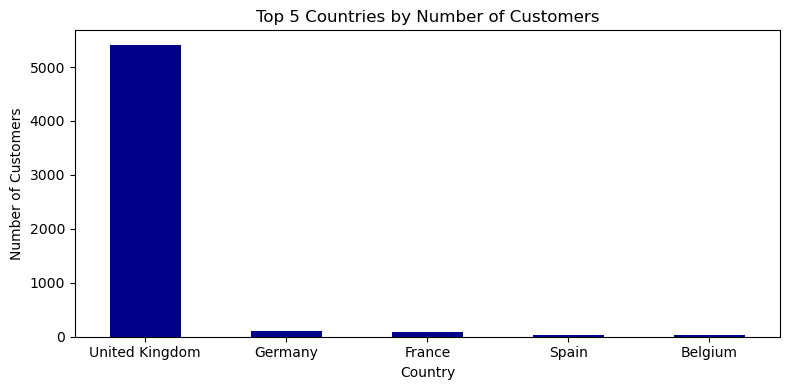

Top 5 Countries by Proportion of Customers:
country
United Kingdom    5410
Germany            107
France              95
Spain               41
Belgium             29
Name: customer_id, dtype: int64


In [68]:
# Distribution 
plt.figure(figsize=(8, 4))
customers_per_country.plot(kind='bar', color='darkblue')
plt.title('Top 5 Countries by Number of Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Top 5 Countries by Proportion of Customers:")
print(customers_per_country)


In [69]:
customer_distribution_by_country = customers_per_country / customers_per_country.sum()
top_5_countries = customer_distribution_by_country.head(5)

# Percentage of UK customers
uk_customers = customer_distribution_by_country.get('United Kingdom', 0)
uk_customers = uk_customers * 100
print(f"Percentage of customers located in United Kingdom: {uk_customers:.2f}%")

Percentage of customers located in United Kingdom: 95.21%


## ${\textbf{Cohort Creation}}$

In [70]:
## Key findings so far + brainstorming:
# Time-range: 01/12/2009 - 09/12/2011
# B2B: We are dealing with online retail data, in fact the retailer was selling "unique all-occasion gift-ware" to wholesalers.
# Around 95% of the customers (wholesalers) were located in UK.
# Benefit of a Cohort Analysis: It is useful for understanding long-term trends and effects of specific campaigns or external factors.
# Assumption: Before and during certain events such as national holidays, retailers are offering special offers and discounts to their customers to increase revenue. 
# Let's find an impactful uk-related "National Holidays" around which we can build our Cohorts: Christmas Season.
# First, I'm going to search for any patterns and trends on a larger (monthly) scale, afterwards in more detail (weekly-based).
# Some weeks of Christmas Season 2010 are effected by really high missing customer_id's. 

## ${\textbf{Monthly: First-Time Buyers}}$

In [71]:
# Calculate 'MonthStart' as the start of the month for each 'invoice_date'
df_cohort['MonthStart'] = df_cohort['invoice_date'].dt.to_period('M').dt.start_time  # Using to_period('M') to get the start of the month

# Define cohorts based on the month of the customer's first purchase
df_cohort['CohortMonth'] = df_cohort.groupby('customer_id')['MonthStart'].transform('min')

# Calculate monthly cohort index for each transaction (number of months since first purchase)
df_cohort['CohortIndex'] = ((df_cohort['MonthStart'].dt.year - df_cohort['CohortMonth'].dt.year) * 12 +
                            (df_cohort['MonthStart'].dt.month - df_cohort['CohortMonth'].dt.month))
df_cohort['CohortIndex'] = df_cohort['CohortIndex'].astype(int)  # Convert to integer to remove any decimals

# Group by CohortMonth and CohortIndex to count unique customers
grouping = df_cohort.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['customer_id'].nunique().reset_index()
cohort_data.rename(columns={'customer_id': 'Customer Count'}, inplace=True)

# Create a pivot table for retention data
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer Count')


print("Monthly Cohort Counts Table:\n", cohort_counts)

Monthly Cohort Counts Table:
 CohortIndex      0      1      2      3      4      5      6      7      8   \
CohortMonth                                                                   
2009-12-01   1045.0  392.0  358.0  447.0  410.0  408.0  408.0  374.0  355.0   
2010-01-01    394.0   86.0  119.0  120.0  110.0  115.0  105.0   91.0  114.0   
2010-02-01    363.0  109.0   82.0  110.0   93.0   76.0   79.0  103.0  100.0   
2010-03-01    436.0   95.0  113.0  103.0  100.0   87.0  105.0  130.0  126.0   
2010-04-01    291.0   67.0   58.0   47.0   54.0   67.0   79.0   76.0   33.0   
2010-05-01    254.0   49.0   45.0   49.0   48.0   66.0   56.0   33.0   17.0   
2010-06-01    269.0   58.0   53.0   55.0   62.0   76.0   35.0   25.0   22.0   
2010-07-01    183.0   38.0   37.0   52.0   55.0   28.0   21.0   28.0   26.0   
2010-08-01    158.0   39.0   50.0   51.0   29.0   21.0   16.0   22.0   23.0   
2010-09-01    242.0   73.0   63.0   34.0   22.0   25.0   34.0   24.0   30.0   
2010-10-01    379.0  1

In [72]:
# Comparing Sums
# Total number of First-Time Buyers must be equal to Total Number of Customers (5942)
total_first_time_buyers = cohort_counts[0].sum()

# Print the total number of first-time buyers
print("Total number of first-time buyers:", total_first_time_buyers)

Total number of first-time buyers: 5942.0


## ${\textbf{Monthly: Retention Analysis}}$

In [73]:
# Retention rates
cohort_sizes = cohort_counts.iloc[:, 0]  

# Convert percentages + rounding
retention = cohort_counts.divide(cohort_sizes, axis=0) * 100
retention = np.around(retention)

# Replace NaN values with 0 after rounding and then convert floats to integers
retention = retention.fillna(0).astype(int)

print("\nRetention Rates Table in %:\n", retention)


Retention Rates Table in %:
 CohortIndex   0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  \
CohortMonth                                           ...                       
2009-12-01   100  38  34  43  39  39  39  36  34  38  ...  31  26  30  29  27   
2010-01-01   100  22  30  30  28  29  27  23  29  34  ...  15  22  19  18  19   
2010-02-01   100  30  23  30  26  21  22  28  28  29  ...  20  18  17  15  23   
2010-03-01   100  22  26  24  23  20  24  30  29  11  ...  17  17  16  17  20   
2010-04-01   100  23  20  16  19  23  27  26  11  12  ...  15  14  14  17  21   
2010-05-01   100  19  18  19  19  26  22  13   7   9  ...  13  14  17  16   5   
2010-06-01   100  22  20  20  23  28  13   9   8  12  ...  12  14  20   6   0   
2010-07-01   100  21  20  28  30  15  11  15  14  12  ...  17  25   9   0   0   
2010-08-01   100  25  32  32  18  13  10  14  15  13  ...  20   7   0   0   0   
2010-09-01   100  30  26  14   9  10  14  10  12  14  ...   5   0   0   0   0  

In [74]:
# Before creating the heatmap, I'd like to add a new colum
# to our Retentation df, showing us the absolut counts 
# of new first-time buyer for each cohort. 
# I name the colum "nb" short for new buyers. 

In [75]:
# Extract the Cohort Index 0 column and rename it to 'nb'
new_buyers = cohort_counts[[0]].rename(columns={0: 'nb'})
new_buyers['nb'] = new_buyers['nb'].astype(int)
 
# Concatenate new_buyers with retention along the columns
retention_with_new_buyers = pd.concat([new_buyers, retention], axis=1)

print("\nUpdated Retention Rates Table (in %) with New Buyers (nb in absolute):\n", retention_with_new_buyers)


Updated Retention Rates Table (in %) with New Buyers (nb in absolute):
 CohortIndex    nb    0   1   2   3   4   5   6   7   8  ...  15  16  17  18  \
CohortMonth                                             ...                   
2009-12-01   1045  100  38  34  43  39  39  39  36  34  ...  31  26  30  29   
2010-01-01    394  100  22  30  30  28  29  27  23  29  ...  15  22  19  18   
2010-02-01    363  100  30  23  30  26  21  22  28  28  ...  20  18  17  15   
2010-03-01    436  100  22  26  24  23  20  24  30  29  ...  17  17  16  17   
2010-04-01    291  100  23  20  16  19  23  27  26  11  ...  15  14  14  17   
2010-05-01    254  100  19  18  19  19  26  22  13   7  ...  13  14  17  16   
2010-06-01    269  100  22  20  20  23  28  13   9   8  ...  12  14  20   6   
2010-07-01    183  100  21  20  28  30  15  11  15  14  ...  17  25   9   0   
2010-08-01    158  100  25  32  32  18  13  10  14  15  ...  20   7   0   0   
2010-09-01    242  100  30  26  14   9  10  14  10  12  ..

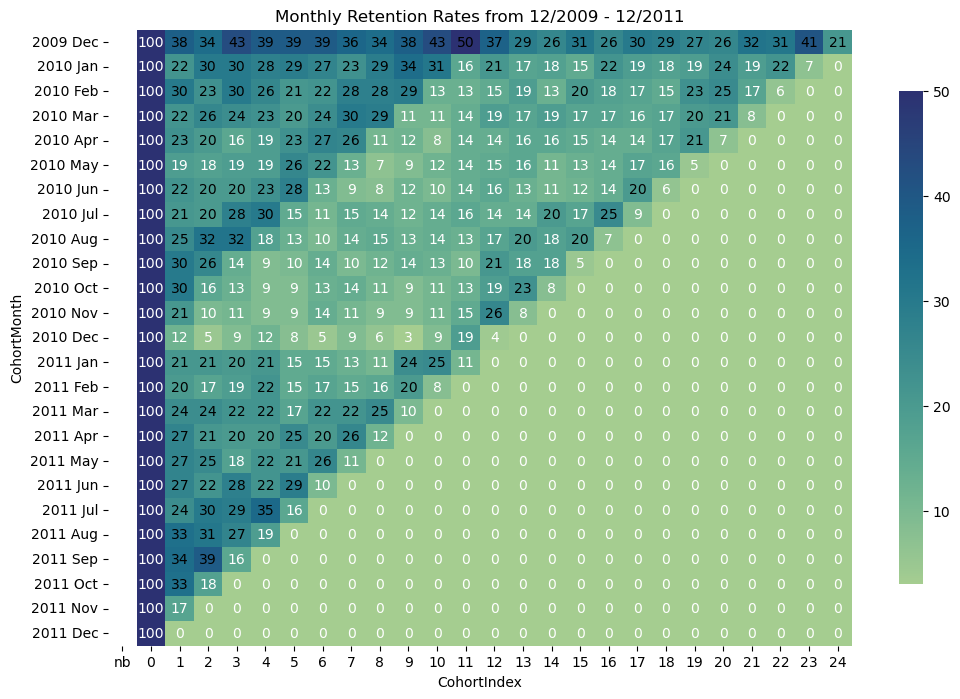

In [76]:
# Set vmax for the color scale based on relevant data
vmax = retention_with_new_buyers.iloc[:, 2:].max().max()

# Create a mask for hiding the first column
mask = np.zeros_like(retention_with_new_buyers, dtype=bool)
mask[:, 0] = True  # Set the first column of the mask to True to hide these cells

# Create the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    retention_with_new_buyers,
    mask=mask,
    annot=True,
    fmt='d',  # Use 'd' for integer display
    cmap='crest',
    vmin=3,  # Start color scale at 3
    vmax=vmax,  # End color scale at the max of the other columns
    cbar_kws={'shrink': .8}
)

# Draw white rectangles for the first column
num_rows = len(retention_with_new_buyers)
for i in range(num_rows):
    # Overlay a white rectangle for each cell in the first column
    ax.add_patch(plt.Rectangle((0, i), 1, 1, fill=True, color='white', lw=0))
    # Ensure the text color in the first column is black for visibility
    # First column texts are set again here in case they are lost or not visible
    ax.texts[i].set_color('black')

# Customize text color for all columns
for text in ax.texts:
    cell_value = int(text.get_text())  # Get the text value
    col_index = int(text.get_position()[0])  # Get the column index
    if col_index == 0:  # First column, ensure text is black
        text.set_color('black')
    elif col_index == 1:  # Second column, set all text to white
        text.set_color('white')
    else:  # Other columns, conditional coloring
        text.set_color('white' if cell_value < 20 else 'black')

# Add labels, title, etc.
formatted_labels = retention_with_new_buyers.index.strftime('%Y %b')
ax.set_yticklabels(formatted_labels, rotation=0)
ax.set_title("Monthly Retention Rates from 12/2009 - 12/2011")
plt.show()


## ${\textbf{First-Time Buyers: Weekly}}$

In [77]:
## Creating a Cohort Table including all weeks to evaluate and compare the Total Sums of First-Time Buyers vs. Total Number of Customers 
## to make sure I'm on the right track. 


# Calculate 'WeekStart' as the start of the week for each 'invoice_date'
df_cohort['WeekStart'] = df_cohort['invoice_date'].dt.to_period('W').apply(lambda r: r.start_time)  # Using to_period to get the start of the week

# Define cohorts based on the week of the customer's first purchase
df_cohort['CohortWeek'] = df_cohort.groupby('customer_id')['WeekStart'].transform('min')

# Calculate weekly cohort index for each transaction (number of weeks since first purchase)
df_cohort['CohortIndex'] = (df_cohort['WeekStart'] - df_cohort['CohortWeek']).dt.days / 7
df_cohort['CohortIndex'] = df_cohort['CohortIndex'].astype(int)  # Convert to integer to remove any decimals

# Group by CohortWeek and CohortIndex to count unique customers
grouping = df_cohort.groupby(['CohortWeek', 'CohortIndex'])
cohort_data = grouping['customer_id'].nunique().reset_index()
cohort_data.rename(columns={'customer_id': 'Customer Count'}, inplace=True)

# Create a pivot table for retention data
cohort_counts = cohort_data.pivot(index='CohortWeek', columns='CohortIndex', values='Customer Count')

# Convert the DataFrame from wide to long format
retention_long = cohort_counts.reset_index().melt(id_vars=['CohortWeek'], var_name='CohortIndex', value_name='RetentionRate')

# Print the cohort table
print("Cohort Counts Table:\n", cohort_counts)

Cohort Counts Table:
 CohortIndex    0      1      2     3     4     5     6     7     8     9    \
CohortWeek                                                                   
2009-11-30   469.0  131.0  126.0  29.0   NaN  60.0  67.0  61.0  82.0  75.0   
2009-12-07   367.0   80.0   20.0   NaN  44.0  49.0  47.0  55.0  45.0  35.0   
2009-12-14   192.0    9.0    NaN  22.0  18.0  22.0  24.0  16.0  22.0  19.0   
2009-12-21    17.0    NaN    2.0   2.0   1.0   1.0   3.0   NaN   1.0   NaN   
2010-01-04    66.0   12.0    9.0   7.0   9.0   6.0  11.0  11.0  12.0  12.0   
...            ...    ...    ...   ...   ...   ...   ...   ...   ...   ...   
2011-11-07    46.0    6.0    5.0   6.0   2.0   NaN   NaN   NaN   NaN   NaN   
2011-11-14    43.0    3.0   10.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-21    38.0    5.0    4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-28    31.0    3.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-05    17.0    NaN    NaN   NaN   N

In [78]:
# Comparing Sums
# Total number of First-Time Buyers must be equal to Total Number of Customers (5942)
total_first_time_buyers = cohort_counts[0].sum()

# Print the total number of first-time buyers
print("Total number of first-time buyers:", total_first_time_buyers)

Total number of first-time buyers: 5942.0


In [79]:
# Calculate 'WeekStart' as the start of the week for each 'invoice_date'
df_cohort['WeekStart'] = df_cohort['invoice_date'].dt.to_period('W').apply(lambda r: r.start_time)

# Define cohorts based on the week of the customer's first purchase
# This makes sure 'CohortWeek' is a period, not just a datetime
df_cohort['CohortWeek'] = df_cohort.groupby('customer_id')['WeekStart'].transform('min').dt.to_period('W')

## Now I'm simply filter out the desired timewindow from the Cohort Table, that includes all weeks
## to be able to observe the effect of potential campaigns, special offers and discounts as well as seasonality (Christmas 2010).
## I'm going to start 12 weeks before Christmas Eve and a few weeks after.

# Filter the cohort data for the specific date range
filtered_cohort_data = df_cohort[
    (df_cohort['CohortWeek'] >= pd.Period('2010-08-23', freq='W')) &
    (df_cohort['CohortWeek'] <= pd.Period('2011-01-10', freq='W'))
]

# You need to count unique customers again if not already counted in the filtered data
cohort_data = filtered_cohort_data.groupby(['CohortWeek', 'CohortIndex'])['customer_id'].nunique().reset_index()
cohort_data.rename(columns={'customer_id': 'Customer Count'}, inplace=True)

# Cohort table for retention data
filtered_cohort_counts = cohort_data.pivot(index='CohortWeek', columns='CohortIndex', values='Customer Count')

# Filter to include only up to the 20th week
filtered_cohort_counts = filtered_cohort_counts.loc[:, :12]

# Print the filtered cohort table
print("Filtered Cohort Counts Table:\n", filtered_cohort_counts)

Filtered Cohort Counts Table:
 CohortIndex               0     1     2     3     4     5     6     7    8   \
CohortWeek                                                                    
2010-08-23/2010-08-29   33.0   3.0   1.0   2.0   2.0   3.0   6.0   4.0  4.0   
2010-08-30/2010-09-05   34.0   4.0   1.0   NaN   3.0   5.0   3.0   3.0  2.0   
2010-09-06/2010-09-12   38.0   NaN   4.0   4.0   3.0   3.0   1.0   2.0  2.0   
2010-09-13/2010-09-19   51.0   9.0   8.0   6.0   3.0   4.0   7.0   5.0  6.0   
2010-09-20/2010-09-26   62.0   6.0   4.0   3.0   7.0   3.0   6.0   4.0  5.0   
2010-09-27/2010-10-03  100.0  13.0   7.0  10.0   6.0   4.0   5.0  11.0  7.0   
2010-10-04/2010-10-10   88.0   5.0  12.0  10.0   9.0   8.0   8.0  11.0  9.0   
2010-10-11/2010-10-17   95.0   8.0   5.0   8.0   8.0   9.0  12.0   8.0  5.0   
2010-10-18/2010-10-24   85.0   9.0  13.0   5.0  10.0  14.0   6.0   5.0  7.0   
2010-10-25/2010-10-31   76.0   5.0  11.0   4.0   2.0   4.0   5.0   3.0  1.0   
2010-11-01/2010-11-07

In [ ]:
# Lead-up to Christmas:
# Wholesalers generally make their purchases well ahead of the peak retail season to ensure that they can stock, market,
# and distribute products in time for consumer demand during holidays. This explains the peak in first-time buyers 
# during early fall (late September and early October), as they prepare for the Christmas season.

# December Drop-off:
# The sharp decrease in new buyers in December then reflects the fact that by this time, most wholesalers have completed
# their purchases for the holiday season and are likely focusing on selling through the inventory they've acquired rather than purchasing more.
# Might be also caused by the drop of missing customer_id's: Especially the weeks from 2010-12-12 until 2010-12-26 have significant high 
# percentages of missing values, which I've decided to exclude from this analysis.

## ${\textbf{Retention Analysis}}$

In [80]:
# Retention rates
cohort_sizes = filtered_cohort_counts.iloc[:, 0]  

# Convert percentages, then round traditionally
retention = filtered_cohort_counts.divide(cohort_sizes, axis=0) * 100
retention = np.around(retention)

# Replace NaN values with 0 after rounding and then convert floats to integers
retention = retention.fillna(0).astype(int)

# Print retention rates
print("\nRetention Rates Table in %:\n", retention)


Retention Rates Table in %:
 CohortIndex             0   1   2   3   4   5   6   7   8   9   10  11  12
CohortWeek                                                                
2010-08-23/2010-08-29  100   9   3   6   6   9  18  12  12   6   9   6  15
2010-08-30/2010-09-05  100  12   3   0   9  15   9   9   6   3  12   9  18
2010-09-06/2010-09-12  100   0  11  11   8   8   3   5   5  11   3   8   8
2010-09-13/2010-09-19  100  18  16  12   6   8  14  10  12  10   8  10   6
2010-09-20/2010-09-26  100  10   6   5  11   5  10   6   8  15  10   5   3
2010-09-27/2010-10-03  100  13   7  10   6   4   5  11   7   9   4   6   1
2010-10-04/2010-10-10  100   6  14  11  10   9   9  12  10   8   7   1   0
2010-10-11/2010-10-17  100   8   5   8   8   9  13   8   5   8   1   0   4
2010-10-18/2010-10-24  100  11  15   6  12  16   7   6   8   5   0   1   0
2010-10-25/2010-10-31  100   7  14   5   3   5   7   4   1   0   3   4   1
2010-11-01/2010-11-07  100  18  14  12  11   7  11   4   0   4   3   7

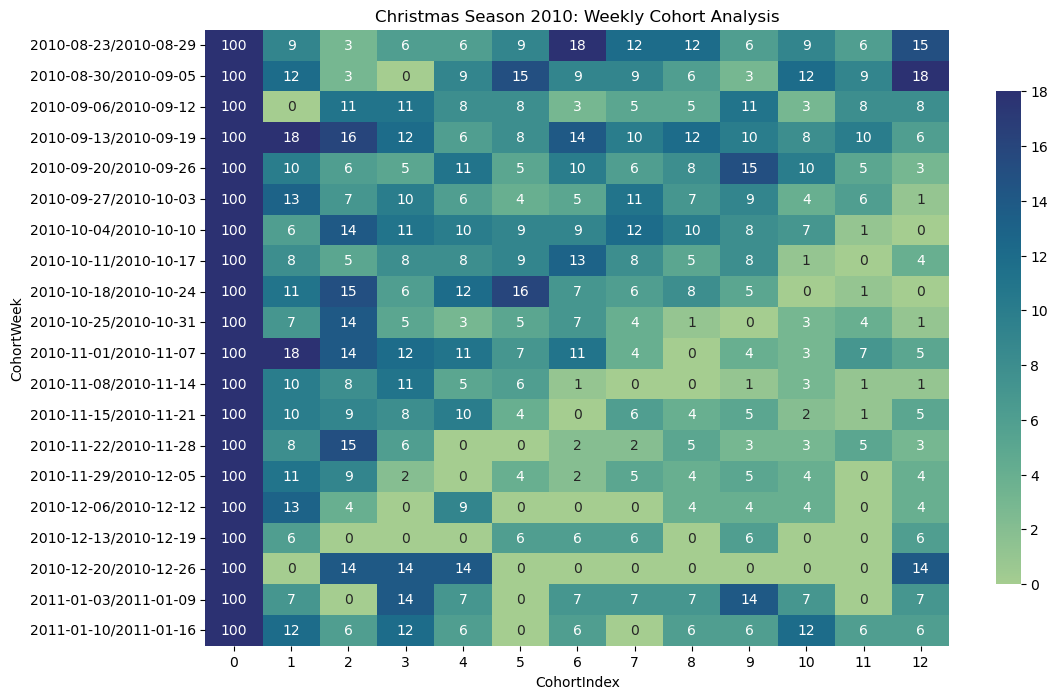

In [81]:
# Assuming 'retention' is your DataFrame
# Set the color scale's maximum value based on all columns except the first
vmax = retention.iloc[:, 1:].max().max()

# Create the heatmap without masking but using customized color scale limits
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    retention,
    annot=True,
    fmt='d',  
    cmap='crest',
    vmin=0,  
    vmax=vmax, 
    cbar_kws={'shrink': .8}
)
ax.set_title("Christmas Season 2010: Weekly Cohort Analysis")
plt.show()